# eLabFTW API workshop - Part 3 - Using Python

## eLabFTW's Python Library: `elabapi-python`

Python is a versatile and easy to learn programming language. If you're using a GNU/Linux operating system, it is already installed. Try typing `python` in a terminal.

We will now send requests to the API using python, and more specifically a library that has been designed for eLabFTW: `elabapi_python`.

This library provides a structured approach to sending API requests, following a defined schema. All available methods and their usage are documented in the official API reference.

### Part 1. Setup the Environment

To ensure a clean and isolated workspace, we will set up a **Python virtual environment** and install the required library using `pip`.

We are going to create a virtual environment and activate it with the following commands:

In [ ]:
# create environment using venv module (-m venv), named 'venv'
!python -m venv venv
# activate it
!source venv/bin/activate
# install required library
!pip install elabapi-python

After installation, your environment is ready to interact with the eLabFTW API. 🚀

📖 **API Documentation:**

🔗 **[doc-elabftw-elabapi](https://doc.elabftw.net/api/elabapi-html/)**

Additionally, example scripts tailored for users can be found in the **examples** folder of the GitHub repository:


📂 **Example Scripts:**

🔗 **[Examples using elabapi-python](https://github.com/elabftw/elabapi-python/tree/master/examples)**

### Sending a Request to the API

To start, we will send a request to the **Info** endpoint, similar to the first example using `curl`. The response should match the output from our earlier `curl` request, confirming that our API authentication and setup are working correctly.

## Part 2. 🔍 Retrieving Environment Variables

In Python, you can get environment variables by using `os` module. This allows your script to access sensitive variables (such as the key) without having to write them in the script and prevent accidental leakage.

Set the environment variables as shown in [part 1](1-api-workshop-curl.ipynb#Environment-Setup-&-API-Key-Authentication).

In [ ]:
%env API_URL=https://api-workshop.elab.one/api/v2
%env API_KEY=1-d0336f788bd0c1984ff5f9e6a198e43c95367072bb149225aff9aeb5bf1283f1231f20e863b2c2399cc31

In [ ]:
import os

Let us verify that the correct parameters are present:

In [ ]:
print(os.getenv("API_URL"))
print(os.getenv("API_KEY"))

## Part 3. Configuring the eLabAPI-Python Client  

The following code sets up the `elabapi-python` client by providing the necessary API key, host URL, and security settings.



In [ ]:
import elabapi_python
# initiate a configuration object
configuration = elabapi_python.Configuration()
# configure API Key
configuration.api_key["api_key"] = os.getenv("API_KEY")
configuration.api_key_prefix["api_key"] = "Authorization"
# configure API Url
configuration.host = os.getenv("API_URL")
#TODO: remove when url corrected
configuration.verify_ssl = False

Initiate the API Client object with the configuration object.

In [ ]:
api_client = elabapi_python.ApiClient(configuration)
api_client.set_default_header(header_name="Authorization", header_value=os.getenv("API_KEY"))

We are now done with the library's configuration. This part has to be included in all scripts.

### Info Endpoint

As a first example, we will now use a specific endpoint: `info`.

In [ ]:
# instanciate the infoApi object
info_api = elabapi_python.InfoApi(api_client)
# make a get request
api_response = info_api.get_info()
# show the response
print(api_response)

And the response you should get back from the server:

*Formatted JSON:*
```json
{
    'active_users_count': 9,
    'all_users_count': 10,
    'elabftw_version': "5.2.0-alpha",
    'elabftw_version_int': 50200,
    'experiments_count': 334,
    'experiments_timestamped_count': 0,
    'items_count': 232,
    'teams_count': 4,
    'ts_balance': 0,
    'uploads_filesize_sum': 2079,
    'uploads_filesize_sum_formatted': "2.03 KiB"
}

## Part 4. Full **CRUD**

We will now **C**reate, **R**ead, **U**pdate and **D**elete using the library.

### Let's post an experiment 

This command leverages the elabapi_python library to send a POST request that creates a new experiment.

In [ ]:
experiments_api = elabapi_python.ExperimentsApi(api_client)
# post a new experiment
experiments_api.post_experiment()

<div class="alert alert-block alert-success"><b>Success:</b> The experiment has been created in your eLabFTW instance and now exists under the title <b>"Untitled"</b>. 🎉 </div>

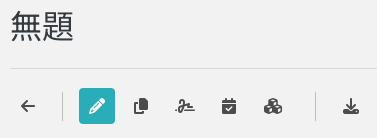

Instead of relying on the default **"Untitled"**, let's create an experiment with a defined title. This will demonstrate how to use the same function while passing a **JSON payload**.

In [ ]:
# define the experiment data (payload)
payload = {'title': 'This has been created in Jupyter Notebook using the python library.'}
# assign the payload to the request body
experiments_api.post_experiment(body=payload)

### Patch an experiment

This command sends a PATCH request that updates an existing experiment using its provided ID and the necessary modifications.

In [ ]:
# id of the experiment to be patched
exp_id = 4
# define the parameters for patching the experiment
payload = {
    "title" : "Title updated via Jupyter Notebook with elabapi-python"
}
# assign the id, the request body and send the pach
patch_response = experiments_api.patch_experiment(exp_id, body=payload)
print(patch_response)

<div class="alert alert-block alert-success"><b>Success:</b> The experiment has been been patched. The resource's information is returned. 🎉 </div>

### Upload a file

In [ ]:
uploads_api = elabapi_python.UploadsApi(api_client)

# upload the file 'antibodies.csv' present in the data folder
uploads_api.post_upload('experiments', exp_id, file='data/antibodies.csv', comment='Uploaded with elabapi-python')
# we can print a list of the uploaded files
for upload in uploads_api.read_uploads('experiments', exp_id):
    print(upload.id, upload.real_name, upload.comment)

<div class="alert alert-block alert-success"><b>Success:</b> The file has been uploaded to the experiment. 🎉</div>

### Replace an existing file with a new one

You can replace an existing file by providing its ID, and the new file as parameters.

In [ ]:
# get the latest id created
uploads = list(uploads_api.read_uploads('experiments', id))
newest_upload_id = uploads[-1].id

# replace the file 'antibodies.csv' with a file of your choice, e.g. 'README.md'
uploads_api.post_upload_replace('experiments', exp_id, newest_upload_id, file='README.md', comment='Replaced antibodies.csv with README.md')

for upload in uploads_api.read_uploads('experiments', exp_id):
    print(upload.id, upload.real_name, upload.comment)

<div class="alert alert-block alert-success"><b>Success:</b> The file 'antibodies.csv' has been replaced by the 'README.md'. 🎉</div>

### Download the file locally

You can download the file via the API and also perform a delete.

In [ ]:
# display id, name and comment of the uploaded files
for upload in uploads_api.read_uploads('experiments', exp_id):
    print(upload.id, upload.real_name, upload.comment)
    # get and save file
    with open(f'README.md', 'wb') as file:
        file.write(uploads_api.read_upload('experiments', exp_id, upload.id, format='binary', _preload_content=False).data)
    # delete all the files where the name is 'README.md'
    if upload.real_name == 'README.md':
        uploads_api.delete_upload('experiments', exp_id, upload.id)